<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Linear_Regression_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear**

In [14]:
import pandas as pd

In [15]:
file = 'raw_fighter_details.csv'
df = pd.read_csv( file )

In [16]:
# Entendendo a Nomenclatura dos Campos
df.columns

Index(['fighter_name', 'Height', 'Weight', 'Reach', 'Stance', 'DOB', 'SLpM',
       'Str_Acc', 'SApM', 'Str_Def', 'TD_Avg', 'TD_Acc', 'TD_Def', 'Sub_Avg'],
      dtype='object')

In [17]:
# Selecionando Campos e eliminando valores Nulos
df_selected = df[ ['Height', 'Weight', 'Reach', 'Stance']]
df_selected = df_selected.dropna()

In [18]:
# Avaliando base de dados
display(df_selected.describe())

,Height,Weight,Reach,Stance
count,1664,1664,1664,1664
unique,22,38,27,4
top,"6' 0""",155 lbs.,"73""",Orthodox
freq,195,276,162,1247


In [19]:
# Função para converter string para pés (float)
def convert_height(height):
  feet, inches = height.split("\'")
  inches, _ = inches.split('"')

  return float(feet) * 12 + float(inches)

In [20]:
height_series = df_selected['Height']
weight_series = df_selected['Weight']
reach_series = df_selected['Reach']
stance_series = df_selected['Stance']

height = [convert_height(i) for i in height_series]
# [0] pois retorna uma lista com 2 elementos [0, 1]
weight = [float(w.split(' ')[0]) for w in weight_series]
reach = [float(r.split('"')[0]) for r in reach_series]
stance = [-1 if s == 'Orthodox' else 1 for s in stance_series]

In [21]:
data = {
    'Height' : height,
    'Weight' : weight,
    'Reach' : reach,
    'Stance' : stance
}

df_data = pd.DataFrame( data )
df_data.head()

,Height,Weight,Reach,Stance
0,75.0,235.0,76.0,-1
1,71.0,170.0,71.0,-1
2,72.0,205.0,74.0,-1
3,77.0,265.0,80.0,-1
4,73.0,185.0,76.0,-1


## **y = B1 x height + B2 x weight + B3 x Reach + B4 x Stance**

In [22]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error

### **Seperando o Dataset em Treinamento e Teste (Dataset)**

In [33]:
train, test = train_test_split( df_data, train_size=0.75, random_state = 0)
df_data_treino = pd.DataFrame( train, columns=df_data.columns)
df_data_teste  = pd.DataFrame( test, columns=df_data.columns)

In [34]:
X_Features = ['Weight', 'Reach', 'Stance']

y_treino = df_data_treino[['Height']]
X_treino = df_data_treino[X_Features]

In [35]:
y_test = df_data_teste[['Height']]
X_test = df_data_teste[X_Features]

modelo = sm.OLS(y_treino, X_treino).fit()
y_pred = modelo.predict(X_test)

In [36]:
# Erro Médio Quadrado
mse = mean_squared_error(y_test, y_pred)

# Função de pontuação de regressão de variância explicada
evs = explained_variance_score(y_test, y_pred, multioutput='uniform_average')

# Erro Médio Sbsoluto
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}' )
print(f'Explained Variance Score: {evs * 100:.2f}')
print(f'Mean Absolut Error: {mae:.2f}')

Mean Squared Error: 3.36
Explained Variance Score: 76.93
Mean Absolut Error: 1.43


In [37]:
modelo.params

Weight   -0.002793
Reach     0.981097
Stance   -0.018345
dtype: float64

In [38]:
print(modelo.summary())

# Podemos verificar que o p-valor das variáveis Weight e Stance não são estatisticamente significativos para o modelo P>|t|
# O ideal pe ser < 0.05 ou < 5%

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.747e+05
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                        0.00
Time:                        15:51:07   Log-Likelihood:                         -2562.2
No. Observations:                1248   AIC:                                      5130.
Df Residuals:                    1245   BIC:                                      5146.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### **Retirando Variáveis Não Estatiscamente Significativas**

#### **Separando o Dataset em Treino e Teste**

In [73]:
train, test = train_test_split( df_data, test_size=0.75, random_state=0)
df_data_treino = pd.DataFrame(train, columns=df_data.columns)
df_data_teste = pd.DataFrame(test, columns=df_data.columns)

In [76]:
# Retirando as variáveis que não são estatisticamente significativa
X_features = ['Reach']

y_treino = df_data_treino[['Height']]
X_treino = df_data_treino[X_features]

y_test = df_data_teste[['Height']]
X_test = df_data_teste[X_features]

X_treino = sm.add_constant(X_treino)

# Criando o Modelo / Efetuando Treinamento à partir dos dados de Treino
modelo = sm.OLS(y_treino, X_treino).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1495.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          1.69e-139
Time:                        16:54:43   Log-Likelihood:                -781.81
No. Observations:                 416   AIC:                             1568.
Df Residuals:                     414   BIC:                             1576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9232      1.377     12.293      0.0

In [57]:
# Efetuando Previsão usando os dados de Teste
y_pred = modelo.predict(X_test)
df_data_teste['y_pred'] = y_pred

In [58]:
df_data_teste.head()

,Height,Weight,Reach,Stance,y_pred
1005,68.0,145.0,72.0,-1,70.137376
342,72.0,250.0,74.0,-1,72.085637
381,76.0,238.0,77.0,-1,75.008027
511,73.0,155.0,75.0,-1,73.059767
1610,67.0,145.0,66.0,-1,64.292595


In [63]:
# Erro Médio Quadrado
mse = mean_squared_error(y_test, y_pred)

# Função de pontuação de regressão de variância explicada
evs = explained_variance_score(y_test, y_pred, multioutput='uniform_average')

# Erro Médio Sbsoluto
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}' )
print(f'Explained Variance Score: {evs * 100:.2f}')
print(f'Mean Absolut Error: {mae:.2f}')

Mean Squared Error: 3.53
Explained Variance Score: 71.97
Mean Absolut Error: 1.49


In [59]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Height')

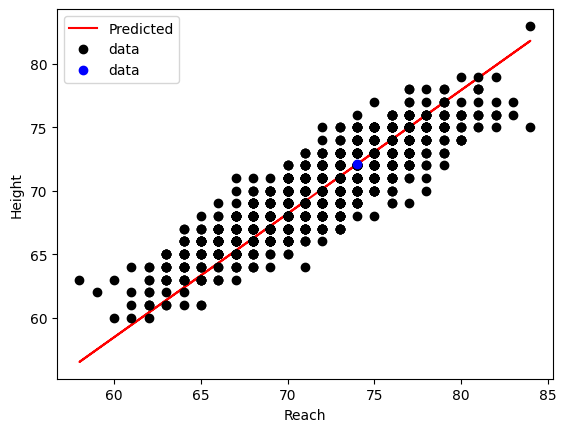

In [72]:
plt.plot(df_data_teste['Reach'], df_data_teste['y_pred'], 'r-', label = 'Predicted')
plt.plot(df_data_teste['Reach'], df_data_teste['Height'], 'ko', label = 'data')
# Usando a previsão para um Reach de 74
plt.plot(74, modelo.predict(74), 'bo', label = 'data')
plt.legend()
plt.xlabel('Reach')
plt.ylabel('Height')

# **Transformando o Dataset para Excel**

In [ ]:
path = r'UFC.xlsx'
df_data.to_excel(path)

In [ ]:
X_Features = ['Weight', 'Reach', 'Stance']
X = df_data[X_Features]
y = df_data['Height']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75, random_state = 0)